** AJUSTE DE CURVAS USANDO UMA COMBINAÇÃO LINEAR DE FUNÇÕES NÃO-LINEARES **

In [33]:
workspace()

In [49]:
function ajcmq(n)
    x = linspace(0.5,1000,n)
    y = ones(length(x),1)
    a = ones(2,2)
    b = ones(2)
    
    for i = 1:length(x)
        y[i] = 0.0743/x[i] -(0.0597*exp(-2*x[i]^2))/x[i] + rand()/1000 ;
    end

    a[1,1] = sum(1./x.^2);
    a[1,2] = sum(exp(-2*x.^2)./x.^2);
    a[2,1] = a[1,2];
    a[2,2] = sum(exp(-4*x.^2)./x.^2);
    b[1,1] = sum(y./x);
    b[2,1] = sum((y.*exp(-2*x.^2))./x);
    AB = a\b
    xfit = x;
    yfit = AB[1]./xfit + AB[2]*exp(-2*xfit.^2)./xfit;
   
    return AB    
end

ajcmq (generic function with 1 method)

In [54]:
@time ajcmq(100000)

2-element Array{Float64,1}:
  0.0777133
 -0.0668863

0.029816 seconds (202 allocations: 19.843 MB, 6.62% gc time)


In [41]:
x = linspace(0.6,2,10)
x = linspace(0.5,10,10)

size(x)

(10,)

In [170]:
t1 = ones(50)

for i = 1:50
    t1[i] = ajcmq(1000);
    #sleep(2)
end

println("maximo: ",maximum(t1))
println("minimo: ",minimum(t2))
println("T medio: ",mean(t3))

0.0035419464111328125

0.0002620220184326172

In [176]:
t2  = ones(50)

for i = 1:50
    t2[i] = ajcmq(10000);
    #sleep(2)
end

println("maximo: ",maximum(t2))
println("minimo: ",minimum(t2))
println("T medio: ",mean(t3))

maximo: 0.004111051559448242
minimo: 0.002402067184448242
T medio: 0.02520252227783203


In [175]:
t3 = ones(50)

for i = 1:50
    t3[i] = ajcmq(100000);
    #sleep(2)
end
   
println("maximo: ",maximum(t3))
println("minimo: ",minimum(t3))
println("T medio: ",mean(t3))

maximo: 0.026376962661743164
minimo: 0.02403712272644043
T medio: 0.02520252227783203


In [177]:
t4 = ones(50)

for i = 1:50
    t4[i] = ajcmq(1000000);
    #sleep(2)
end
   
println("maximo: ",maximum(t4))
println("minimo: ",minimum(t4))
println("T medio: ",mean(t4))

maximo: 0.3449740409851074
minimo: 0.2866239547729492
T medio: 0.32582961082458495


In [179]:
t5 = ones(50)

for i = 1:50
    t5[i] = ajcmq(10000000);
    #sleep(2)
end
   
println("maximo: ",maximum(t5))
println("minimo: ",minimum(t5))
println("T medio: ",mean(t5))

maximo: 3.0965521335601807
minimo: 2.901186943054199
T medio: 2.9819523382186888


In [7]:
using Benchmarks

In [13]:
b = ajcmq(100000)

0.033789873123168945

In [17]:
c = @elapsed ajcmq(100000)

0.026242211

In [16]:
a = @benchmark ajcmq(100000)

================ Benchmark Results ========================
     Time per evaluation: 25.69 ms [24.67 ms, 26.71 ms]
Proportion of time in GC: 2.72% [1.56%, 3.88%]
        Memory allocated: 19.84 mb
   Number of allocations: 176 allocations
       Number of samples: 100
   Number of evaluations: 100
 Time spent benchmarking: 2.71 s


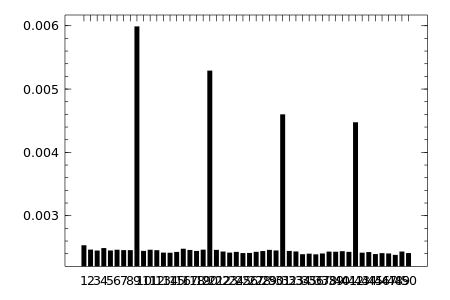

In [164]:
Winston.bar(1:50,t2)